## importing required modules

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.style.use("classic")
%matplotlib notebook

## Generating some data

In [2]:
np.random.seed(11)
X = 2 * np.random.rand(100,1)
y = 4 +3 * X+np.random.randn(100,1)

In [3]:
X.min(),  X.max(), \
y.min(),  y.max()

(0.025561629181217294,
 1.9733466607169372,
 2.2849848170412805,
 10.942114642483496)

## Plotting the data

<IPython.core.display.Javascript object>


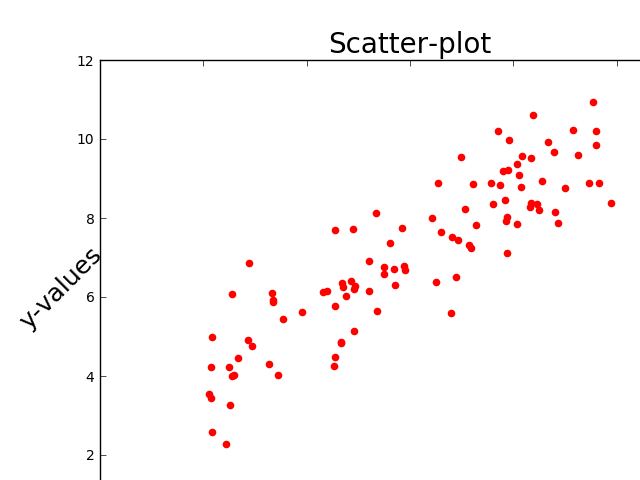

In [4]:
fig,ax = plt.subplots()
fig.set_figwidth(8)
fig.set_figheight(6)


ax.scatter(X,y,marker="o",color = "red")


ax.set_xlabel("x-values",size = 18)
ax.set_ylabel("y-values",size = 18,rotation = 45)
ax.set_title("Scatter-plot",size = 20)

plt.show()

## Linear algebric way to solve

In [5]:
# y = mx +c 
mean_x = X.mean()
mean_y = y.mean()
m = np.sum((X - mean_x) * (y-mean_y)) /np.sum((X-mean_x)**2) 
c = mean_y - mean_x*m

In [6]:
m,c

(3.093000113613762, 3.9559915614333523)

## predicting values

In [7]:
y1 = m*0 + c
y2 = m*2 + c
print(y1,y2)

3.9559915614333523 10.141991788660876


## Analytical way of solving

In [8]:
X_b = np.c_[np.ones((100,1)),X]
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
print(theta_best)

[[3.95599156]
 [3.09300011]]


## predicting values

In [9]:
X_new = np.array([[0],[2]])
X_new_b = np.c_[np.ones((2,1)),X_new]
y_predict = X_new_b.dot(theta_best)
y_predict

array([[ 3.95599156],
       [10.14199179]])

## Let's plot prediction line with calculated:theta

<IPython.core.display.Javascript object>


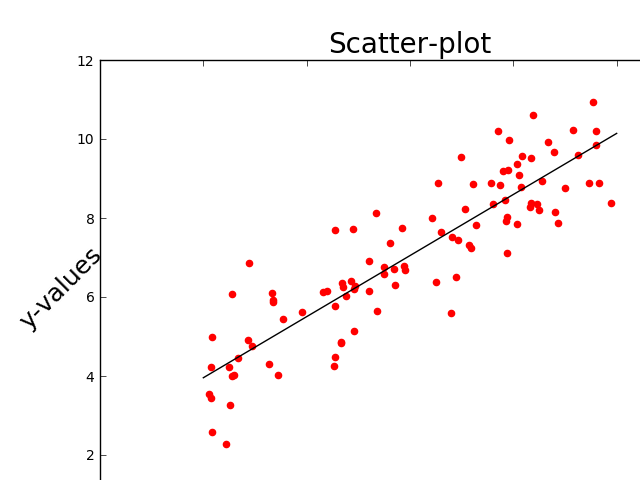

In [10]:
fig,ax = plt.subplots()
fig.set_figwidth(8)
fig.set_figheight(6)


ax.scatter(X,y,marker="o",color = "red")
ax.plot(X_new,y_predict,color="black")

ax.set_xlabel("x-values",size = 18)
ax.set_ylabel("y-values",size = 18,rotation = 45)
ax.set_title("Scatter-plot",size = 20)

plt.show()

# Gradient descent

In [11]:
def cost_calculation(theta,X,y):
    '''
    
    Calculates the cost for given X and Y. The following shows and example of a 
    single dimensional X.
    theta = Vector of thetas 
    X     = Row of X's np.zeros((2,j))
    y     = Actual y's np.zeros((2,1))
    
    where:
        j is the no of features
    '''
    
    
    m = len(y)
    predictions = X.dot(theta)
    cost = (1/2*m) * np.sum(np.square(predictions-y))
    return cost


def gradient_descent(X,y,theta,learning_rate ,iterations):
    '''
    X    = Matrix of X with added bias units
    y    = Vector of Y
    theta=Vector of thetas np.random.randn(j,1)
    learning_rate 
    iterations = no of iterations
    
    Returns the final theta vector and array of cost history over no of iterations
    '''
    m = len(y)
    cost_history = np.zeros(iterations)
    theta_history = np.zeros((iterations,2))
    for it in range(iterations):
        
        prediction = np.dot(X,theta)
        
        theta = theta -(1/m)*learning_rate*( X.T.dot((prediction - y)))
        theta_history[it,:] =theta.T
        cost_history[it]  = cost_calculation(theta,X,y)
        
    return theta, cost_history, theta_history


lr =0.001
n_iter = 10000

theta = np.random.randn(2,1)

X_b = np.c_[np.ones((len(X),1)),X]
theta,cost_history,theta_history = gradient_descent(X_b,y,theta,lr,n_iter)

print('Theta0:          {:0.3f},\nTheta1:          {:0.3f}'.format(theta[0][0],theta[1][0]))
print('Final cost/MSE:  {:0.3f}'.format(cost_history[-1]))

Theta0:          3.940,
Theta1:          3.106
Final cost/MSE:  4160.817


<IPython.core.display.Javascript object>


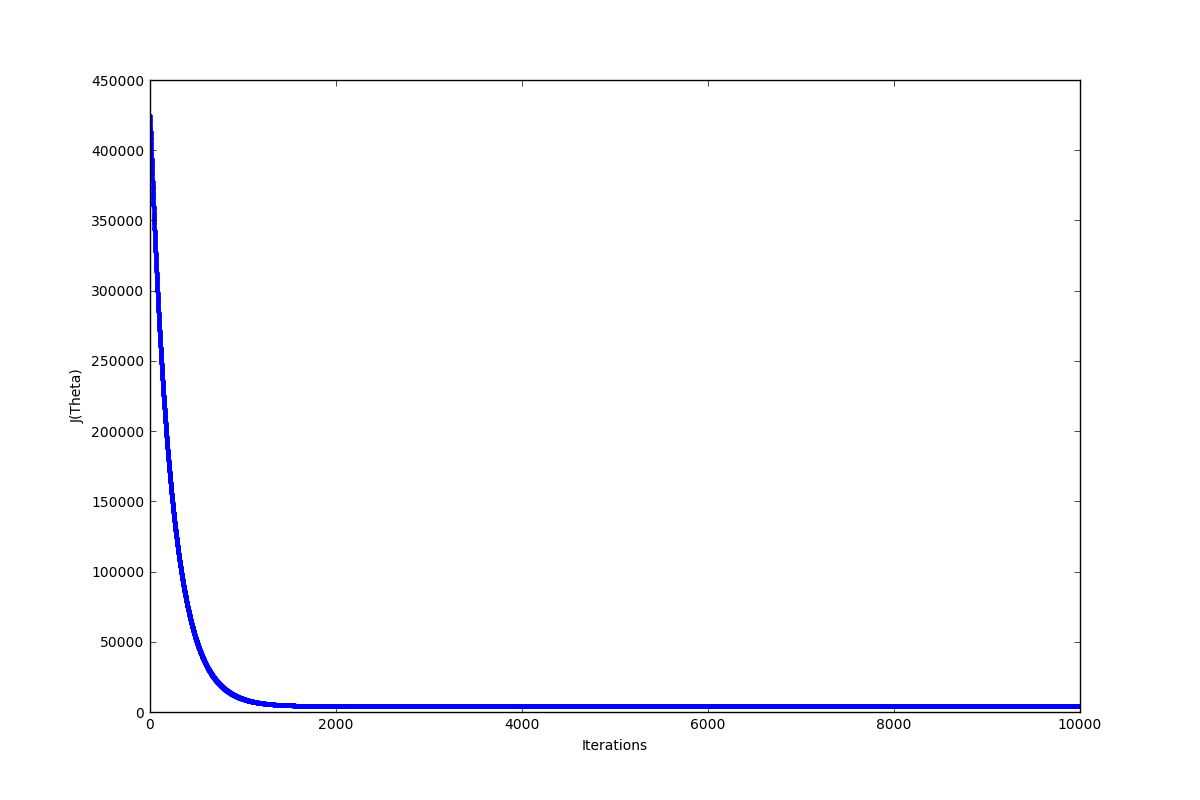

In [12]:
fig,ax = plt.subplots(figsize=(12,8))

ax.set_ylabel('J(Theta)')
ax.set_xlabel('Iterations')
ax.plot(range(n_iter),cost_history,'b.')

In [13]:
def plot_GD(n_iter,lr,ax,ax1=None):
    
    
    """
     n_iter = no of iterations
     lr = Learning Rate
     ax = Axis to plot the Gradient Descent
     ax1 = Axis to plot cost_history vs Iterations plot

    """
    theta = np.random.randn(2,1)

    tr =0.1
    cost_history = np.zeros(n_iter)
    for i in range(n_iter):
        pred_prev = X_b.dot(theta)
        theta,h,_ = gradient_descent(X_b,y,theta,lr,1)
        pred = X_b.dot(theta)

        cost_history[i] = h[0]

        if ((i % 25 == 0) ):
            ax.plot(X,pred,'r-',alpha=tr)
            if tr < 0.8:
                tr = tr+0.2
    if not ax1== None:
        ax1.plot(range(n_iter),cost_history,'b.')
        


<IPython.core.display.Javascript object>


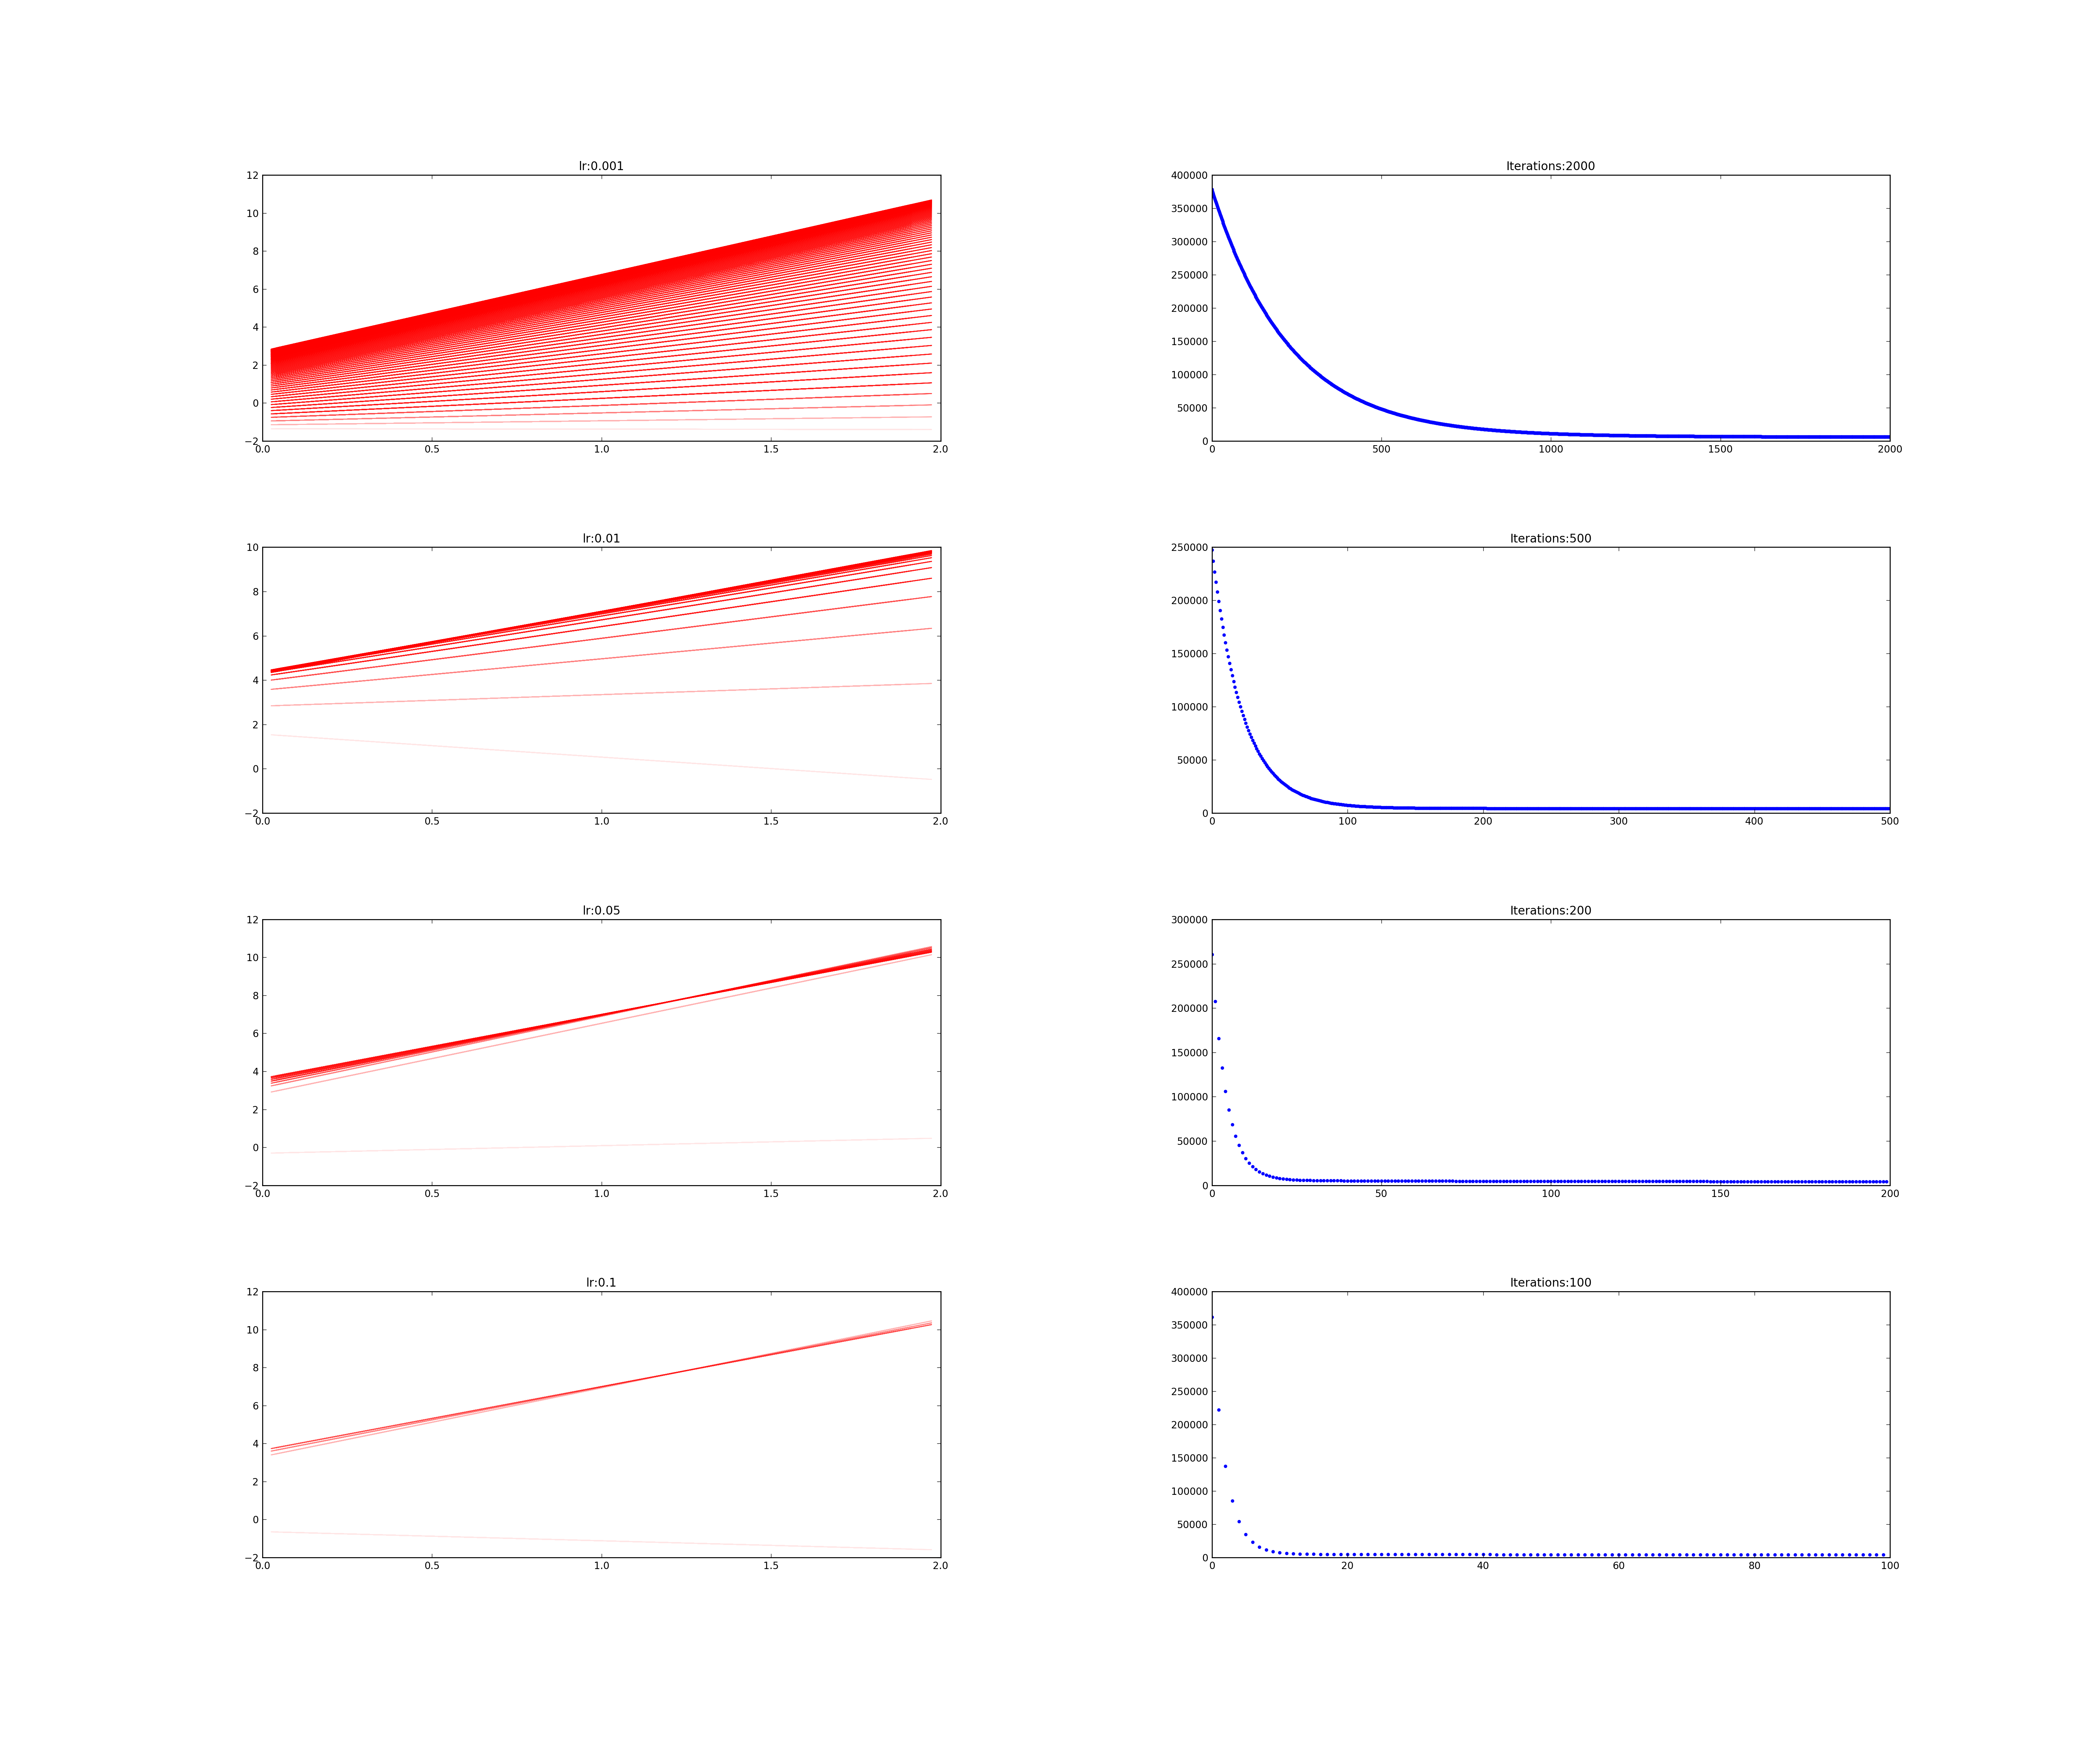

In [14]:
        
fig = plt.figure(figsize=(30,25),dpi=200)
fig.subplots_adjust(hspace=0.4, wspace=0.4)

it_lr =[(2000,0.001),(500,0.01),(200,0.05),(100,0.1)]
count =0
for n_iter, lr in it_lr:
    count += 1
    
    ax = fig.add_subplot(4, 2, count)
    count += 1
   
    ax1 = fig.add_subplot(4,2,count)
    
    ax.set_title("lr:{}".format(lr))
    ax1.set_title("Iterations:{}".format(n_iter))
    plot_GD(n_iter,lr,ax,ax1)

<IPython.core.display.Javascript object>


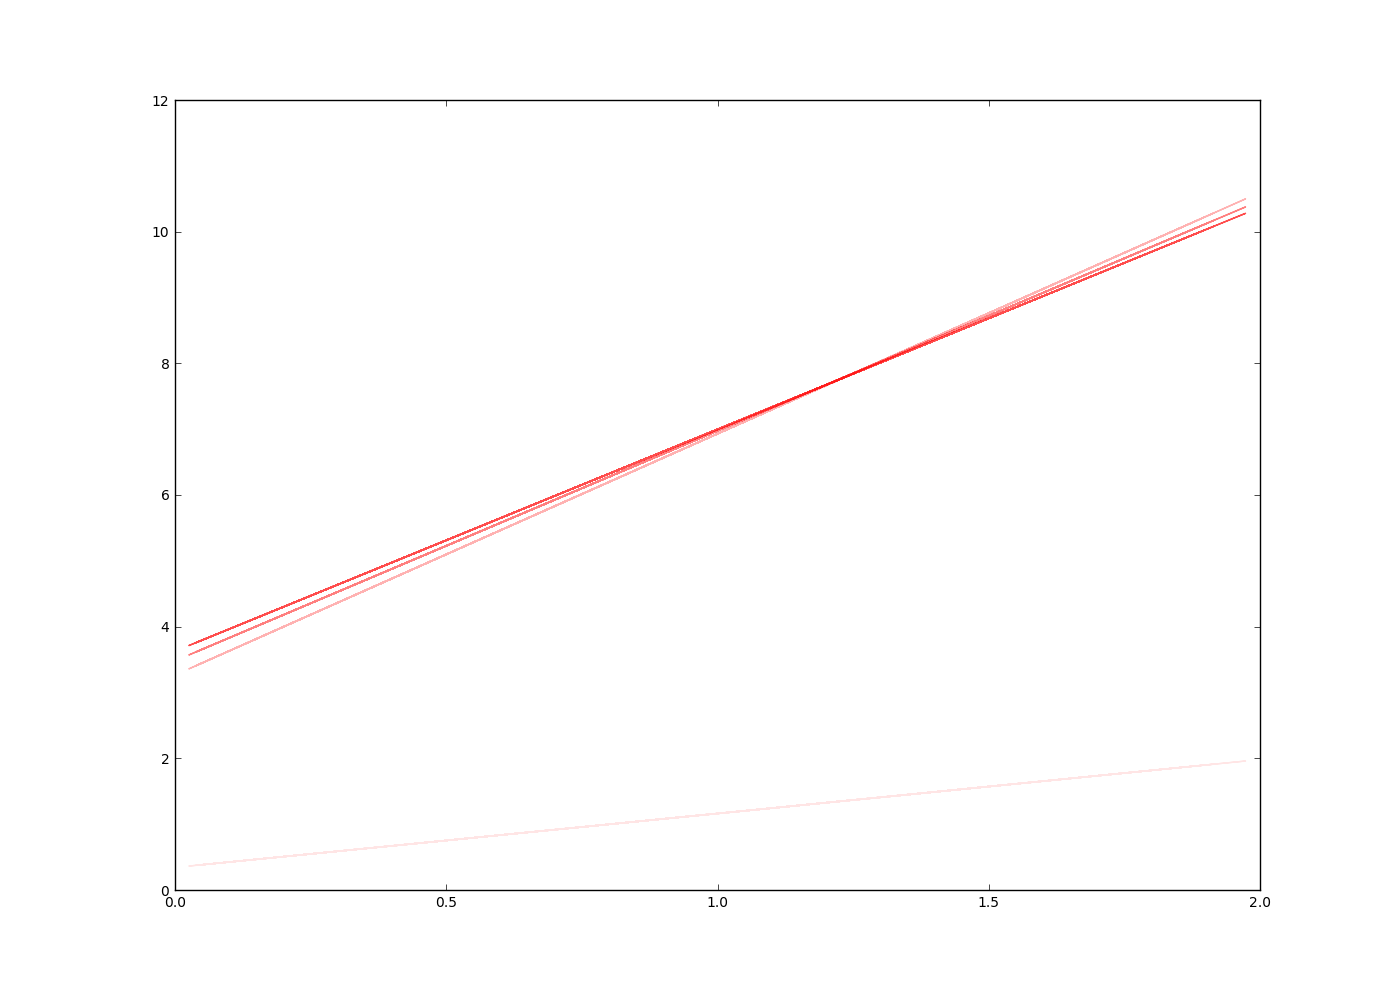

In [15]:
_,ax = plt.subplots(figsize=(14,10))
plot_GD(100,0.1,ax)

## Stochastic Gradient Descent

In [16]:
def stocashtic_gradient_descent(X,y,theta,learning_rate=0.01,iterations=10):
    '''
    X    = Matrix of X with added bias units
    y    = Vector of Y
    theta=Vector of thetas np.random.randn(j,1)
    learning_rate 
    iterations = no of iterations
    
    Returns the final theta vector and array of cost history over no of iterations
    '''
    m = len(y)
    cost_history = np.zeros(iterations)
    
    
    for it in range(iterations):
        cost =0.0
        for i in range(m):
            rand_ind = np.random.randint(0,m)
            X_i = X[rand_ind,:].reshape(1,X.shape[1])
            y_i = y[rand_ind].reshape(1,1)
            prediction = np.dot(X_i,theta)

            theta = theta -(1/m)*learning_rate*( X_i.T.dot((prediction - y_i)))
            cost += cost_calculation(theta,X_i,y_i)
        cost_history[it]  = cost
        
    return theta, cost_history

In [17]:
lr =0.5
n_iter = 50

theta = np.random.randn(2,1)

X_b = np.c_[np.ones((len(X),1)),X]
theta,cost_history = stocashtic_gradient_descent(X_b,y,theta,lr,n_iter)


print('Theta0:          {:0.3f},\nTheta1:          {:0.3f}'.format(theta[0][0],theta[1][0]))
print('Final cost/MSE:  {:0.3f}'.format(cost_history[-1]))

Theta0:          3.836,
Theta1:          3.223
Final cost/MSE:  32.407


In [18]:
cost_history

array([783.83812852, 157.43893809,  69.90366223,  52.82975999,
        58.77433017,  53.23044283,  48.13033319,  48.9199872 ,
        45.71962026,  51.07688549,  59.8410664 ,  49.15071055,
        39.43294876,  48.51992958,  53.80196549,  51.41832835,
        44.7426227 ,  48.51011308,  48.48485405,  49.18970594,
        41.93843905,  48.4068597 ,  47.3374491 ,  50.29427638,
        36.36867136,  39.25559165,  37.03348573,  48.39594181,
        51.18919983,  40.79045889,  43.66117457,  38.72576777,
        42.41594158,  39.82543028,  46.08860029,  41.51751349,
        44.93873634,  43.43569877,  36.69767768,  40.49808129,
        49.48670748,  41.72916326,  46.91101776,  48.52791995,
        43.55406841,  43.86840911,  37.52646218,  42.073462  ,
        39.2059995 ,  32.40686608])

<IPython.core.display.Javascript object>


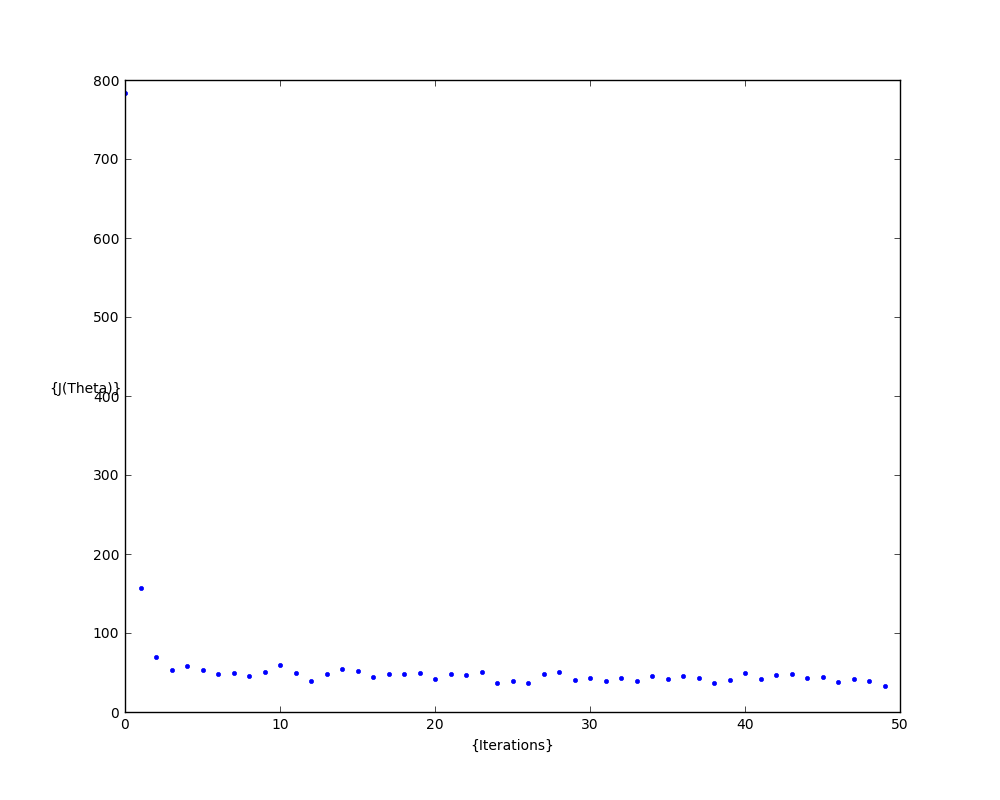

In [19]:
fig,ax = plt.subplots(figsize=(10,8))

ax.set_ylabel('{J(Theta)}',rotation=0)
ax.set_xlabel('{Iterations}')
theta = np.random.randn(2,1)

_=ax.plot(range(n_iter),cost_history,'b.')

## Mini Batch Gradient Descent

In [20]:
def minibatch_gradient_descent(X,y,theta,learning_rate=0.01,iterations=10,batch_size =20):
    '''
    X    = Matrix of X without added bias units
    y    = Vector of Y
    theta=Vector of thetas np.random.randn(j,1)
    learning_rate 
    iterations = no of iterations
    
    Returns the final theta vector and array of cost history over no of iterations
    '''
    m = len(y)
    cost_history = np.zeros(iterations)
    n_batches = int(m/batch_size)
    
    for it in range(iterations):
        cost =0.0
        indices = np.random.permutation(m)
        X = X[indices]
        y = y[indices]
        for i in range(0,m,batch_size):
            X_i = X[i:i+batch_size]
            y_i = y[i:i+batch_size]
            
            X_i = np.c_[np.ones(len(X_i)),X_i]
           
            prediction = np.dot(X_i,theta)

            theta = theta -(1/m)*learning_rate*( X_i.T.dot((prediction - y_i)))
            cost += cost_calculation(theta,X_i,y_i)
        cost_history[it]  = cost
        
    return theta, cost_history

In [21]:
lr =0.1
n_iter = 200

theta = np.random.randn(2,1)


theta,cost_history = minibatch_gradient_descent(X,y,theta,lr,n_iter)


print('Theta0:          {:0.3f},\nTheta1:          {:0.3f}'.format(theta[0][0],theta[1][0]))
print('Final cost/MSE:  {:0.3f}'.format(cost_history[-1]))

Theta0:          3.911,
Theta1:          3.132
Final cost/MSE:  831.835


<IPython.core.display.Javascript object>


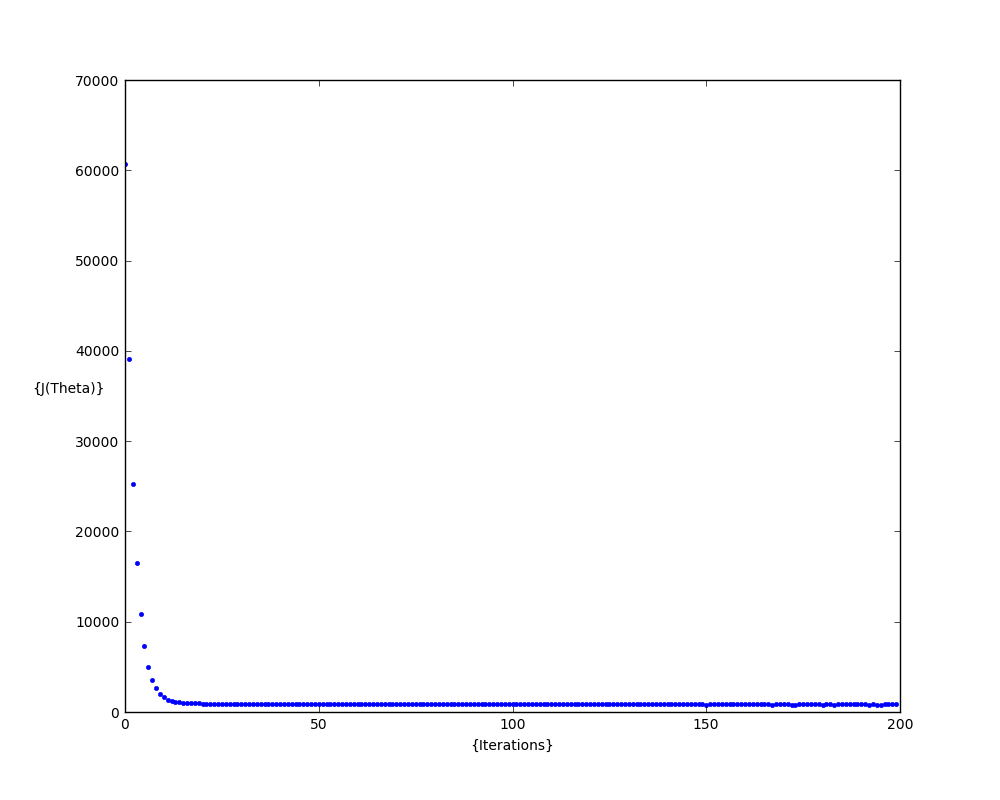

In [22]:
fig,ax = plt.subplots(figsize=(10,8))

ax.set_ylabel('{J(Theta)}',rotation=0)
ax.set_xlabel('{Iterations}')
theta = np.random.randn(2,1)

_=ax.plot(range(n_iter),cost_history,'b.')